# Extreme Value Analysis

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Solution</b>
    
Only the solution and the explanations (in italics) are included here; see the assignment document for the complete questions. All code blocks are retained so that you can still run the notebook locally.

Also, remember that the workshop will be based on this assignment and use some of the Python code you were asked to write!
</p>
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks
import datetime
%matplotlib inline

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 1:</b>
Calculate the design return period using: (1) the Binomial approximation, and (2) the Poisson approximation.   
Comment the results (differences, reasons for them if any...) and choose the design return period.
</p>
</div>

In [2]:
RT_Binomial = 1/(1-(1-0.1)**(1/50))
RT_Poisson = -50/np.log(1-0.1)
print('The return period calculated with the Binomial approximation is:', RT_Binomial)
print('The return period calculated with the Poisson approximation is:', RT_Poisson)

The return period calculated with the Binomial approximation is: 475.06125465234106
The return period calculated with the Poisson approximation is: 474.56107905149526


*When the value of the number of trials in a Binomial distribution is large and the value of p (exceedance
probability here) is very small,the binomial distribution can be approximated by a Poisson distribution.
Thus, no significant differences are obtained.*

*We will adopt a design return period of 475 years.*

In [3]:
pandas = pd.read_csv('Time_Series_DEN_lon_8_lat_56.5_ERA5.txt', delimiter=r"\s+", 
                     names=['date_&_time', 
                            'significant_wave_height_(m)', 
                            'mean_wave_period_(s)', 
                            'Peak_wave_Period_(s)', 
                            'mean_wave_direction_(deg_N)', 
                            '10_meter_wind_speed_(m/s)', 
                            'Wind_direction_(deg_N)'],  # custom header names
                     skiprows=1)  # Skip the initial row (header)


In [4]:
pandas['date_&_time'] = pd.to_datetime(pandas['date_&_time']-719529, unit='D')

# The value 719529 is the datenum value of the Unix epoch start (1970-01-01), 
# which is the default origin for pd.to_datetime().

pandas.head()

date_&_time  significant_wave_height_(m)  \
0 1950-01-01 00:00:00.000000000                     1.274487   
1 1950-01-01 04:00:00.000026880                     1.338850   
2 1950-01-01 07:59:59.999973120                     1.407454   
3 1950-01-01 12:00:00.000000000                     1.387721   
4 1950-01-01 16:00:00.000026880                     1.660848   

   mean_wave_period_(s)  Peak_wave_Period_(s)  mean_wave_direction_(deg_N)  \
0              4.493986              5.177955                   199.731575   
1              4.609748              5.255064                   214.679306   
2              4.775651              5.390620                   225.182820   
3              4.800286              5.451532                   227.100041   
4              5.112471              5.772289                   244.821975   

   10_meter_wind_speed_(m/s)  Wind_direction_(deg_N)  
0                   8.582743              211.166241  
1                   8.867638              226.280409  
2                   9.423382              230.283209  
3                   9.037646              238.879880  
4                  10.187995              242.554054

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 2:</b>
Plot the wave height time series. 
</p>
</div>

Text(0, 0.5, '${H_s (m)}$')

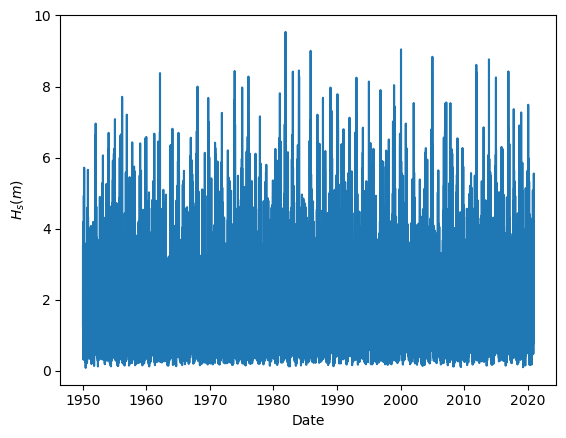

In [5]:
plt.figure(1, facecolor='white')
plt.plot(pandas['date_&_time'], pandas['significant_wave_height_(m)'])
plt.xlabel('Date')
plt.ylabel('${H_s (m)}$')

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 3:</b>
Calculate the basic descriptive statistics. What can you conclude from them?
</p>
</div>

In [6]:
pandas.describe()

significant_wave_height_(m)  mean_wave_period_(s)  \
count                155598.000000         155598.000000   
mean                      1.590250              5.634407   
std                       1.025524              1.292642   
min                       0.085527              2.331908   
25%                       0.845189              4.691991   
50%                       1.343157              5.493290   
75%                       2.072028              6.442927   
max                       9.537492             13.610824   

       Peak_wave_Period_(s)  mean_wave_direction_(deg_N)  \
count         155598.000000                155598.000000   
mean               6.636580                   232.701281   
std                2.034652                    88.523561   
min                1.826027                     0.000001   
25%                5.280570                   195.018128   
50%                6.347569                   257.075066   
75%                7.606390                   303.985158   
max               21.223437                   359.985729   

       10_meter_wind_speed_(m/s)  Wind_direction_(deg_N)  
count              155598.000000           155598.000000  
mean                    8.319785              204.579953  
std                     3.449235               93.936119  
min                     0.337945                0.013887  
25%                     5.749446              125.038362  
50%                     8.063807              221.875462  
75%                    10.585083              286.772466  
max                    28.536715              359.997194

*Another extra step which give a sense on how the data looks is the basic statistical descriptors. Here, we can see that the ranges (min, max) of the variables are reasonable, as well as their mean values. This is an indication that our data is reasonably clean and there are not measurement errors.*

5.003667620267622


(0.0, 350.0)

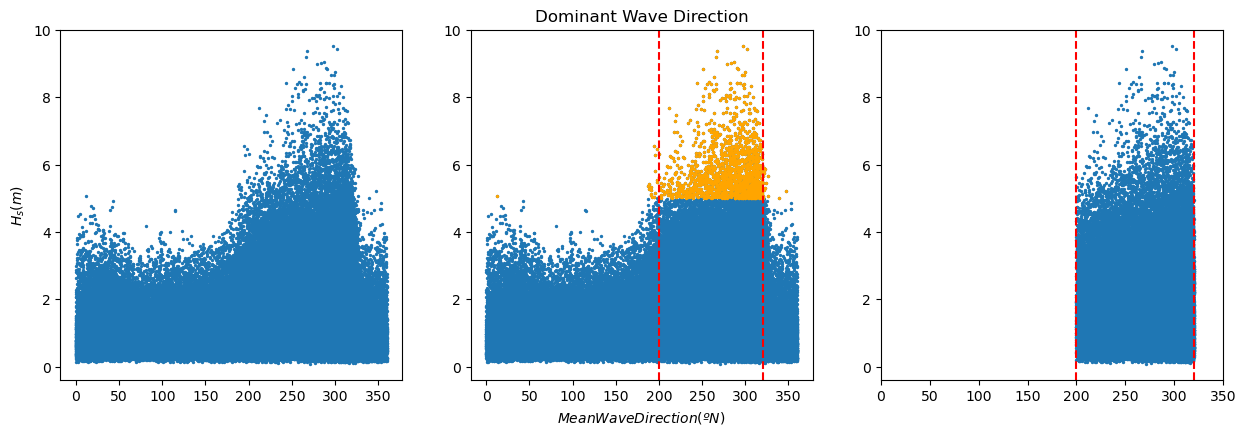

In [7]:
plt.figure(2, figsize = (15,10), facecolor='white')

plt.subplot(2,3,1)
plt.scatter(pandas['mean_wave_direction_(deg_N)'], pandas['significant_wave_height_(m)'], s = 2)
plt.ylabel('${H_s (m)}$')

print(pandas['significant_wave_height_(m)'].quantile(0.99))
pandas_99 = pandas[pandas['significant_wave_height_(m)']>=pandas['significant_wave_height_(m)'].quantile(0.99)]

plt.subplot(2,3,2)
plt.title('Dominant Wave Direction')
plt.scatter(pandas['mean_wave_direction_(deg_N)'], pandas['significant_wave_height_(m)'], s = 2)
plt.scatter(pandas_99['mean_wave_direction_(deg_N)'], pandas_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.axvline(x = 200, color = 'r', linestyle = 'dashed')
plt.axvline(x = 320, color = 'r', linestyle = 'dashed')
plt.xlabel('$Mean Wave Direction (ºN)$')


pandas_angle = pandas[(pandas['mean_wave_direction_(deg_N)'].between(200, 320))]

plt.subplot(2,3,3)
plt.scatter(pandas_angle['mean_wave_direction_(deg_N)'], pandas_angle['significant_wave_height_(m)'], s = 2)
plt.axvline(x = 200, color = 'r', linestyle = 'dashed')
plt.axvline(x = 320, color = 'r', linestyle = 'dashed')
plt.xlim([0, 350])

C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_17016\3757055316.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  L[iL,jL] =  L0[jL]*np.tanh(2*np.pi*(Depth/(L[iL-1,jL])))


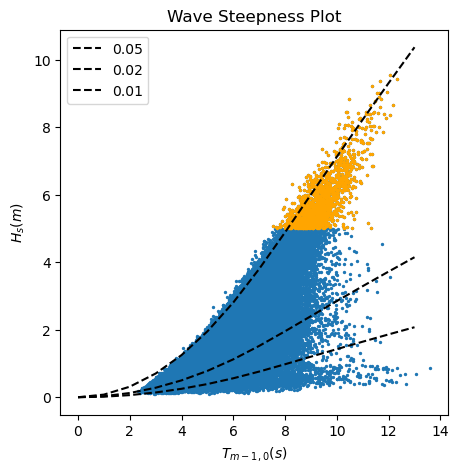

In [8]:
#Calculate theoretical wave steepness lines following the wave dispersion relationship.
N = 15
iterations = 20
Depth = 35
T_p = np.linspace(0,N,N+1)
L0 = 9.81*(T_p**2)/(2*np.pi) # Deep water wave length
L = np.zeros((iterations,len(T_p)))
L[0,:] = L0                # Initial guess for wave length = deep water wave length
L[0,0] = 0.1

# Calculate the wave periods using an iterative approach
for iL in np.arange(1,(len(L[:,0]))):
    for jL in np.arange(0,len(T_p)):
        L[iL,jL] =  L0[jL]*np.tanh(2*np.pi*(Depth/(L[iL-1,jL])))

# Compute theoretical significant wave heights for different steepnesses
Hs005 = L[-1,:]*0.05;
Hs002 = L[-1,:]*0.02;
Hs001 = L[-1,:]*0.01;

plt.figure(3, figsize = (5,5), facecolor='white')
plt.scatter(pandas['mean_wave_period_(s)'], pandas['significant_wave_height_(m)'], s = 2)
plt.scatter(pandas_99['mean_wave_period_(s)'], pandas_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.plot(T_p[:-2], Hs005[:-2], linestyle = 'dashed', color = 'black', label = 0.05)
plt.plot(T_p[:-2], Hs002[:-2], linestyle = 'dashed', color = 'black', label = 0.02)
plt.plot(T_p[:-2], Hs001[:-2], linestyle = 'dashed', color = 'black', label = 0.01)
plt.xlabel('${T_{m-1,0} (s)}$')
plt.ylabel('${H_s (m)}$')
plt.title('Wave Steepness Plot')
plt.legend()

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 4:</b>
Based on the results of the two previous analysis, which data should we consider for our EVA? Why?
</p>
</div>

*First analysis, wave height and mean wave direction: When working with wave data, we need to ensure that we are 
considering waves generated by the same drivers, so it is the same statistical population. For instance, in a given location in the coast, we may have summer storms coming from the North and storms coming from the East during the fall. Both of them will generate extreme observations, but we need to study them independently, since their characteristics are different.*

*Second analysis, wave height and wave period: Swell waves are those generated by wind in the far field and
propagated through long distances towards the coast, although they may not be sustained by wind anymore. Swell waves are usually linked to longer wave periods and, thus,lower values of the wave steepness. On the other hand, locally generated sea waves are usually characterized by short wave periods and higher values of wave steepness. In order to consider waves that are generated by the same drivers, we need to separate waves with very different wave steepness.*

*In the plot above, we can see that the waves over the 99% percentiles present a similar low value of the wave
steepness, being then swell waves. Therefore, we can use for our EVA analysis those waves coming with a mean wave 
angle between 200 and 320 already selected in the dataframe `pandas_angle`.*

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 5:</b>
Apply Yearly Maxima to sample the extreme observations. Plot the results.
</p>
</div>

Text(0, 0.5, '${H_s (m)}$')

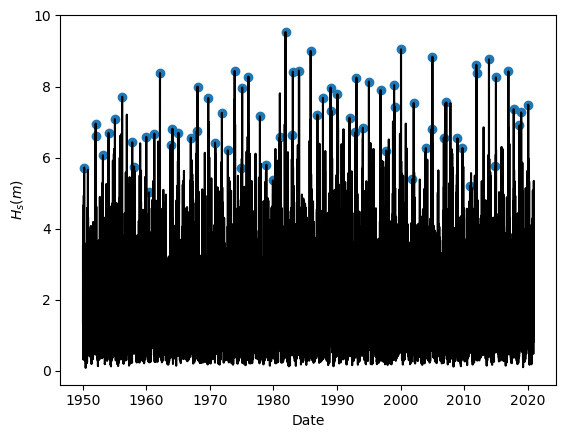

In [9]:
#Function definition
def yearly_maxima(data):
    max_list = pd.DataFrame(columns=data.columns)
    for i in pd.DatetimeIndex(data['date_&_time']).year.unique():
        one_year_value=data[data['date_&_time'].dt.year == i]
        one_year_value_pos=one_year_value['significant_wave_height_(m)'].idxmax()
        one_year_value_DF=one_year_value.loc[[one_year_value_pos]]
        max_list=pd.concat([max_list,one_year_value_DF])
    return max_list

#Using the function
BM_maxima = yearly_maxima(pandas_angle)

#Plotting the results
plt.figure(1, facecolor='white')
plt.plot(pandas_angle['date_&_time'], pandas_angle['significant_wave_height_(m)'], color = 'k')
plt.scatter(BM_maxima['date_&_time'], BM_maxima['significant_wave_height_(m)'])
plt.xlabel('Date')
plt.ylabel('${H_s (m)}$')

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 6:</b>
Fit the sampled extremes to fit a Generalized Extreme Value distribution.
</p>
</div>

In [10]:
#Defining the function
def fit_GEV(data): 
    GEV_param = stats.genextreme.fit(data, method = 'mle')
    return GEV_param

#Using the function
GEV_param_BM = fit_GEV(BM_maxima['significant_wave_height_(m)'])

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 7:</b>
Assess the goodness of fit of the distribution using a QQplot. Comment about the results of the fitting.
</p>
</div>

The following cell completes the task in 4 steps:
1. Define the function for the empirical cumulative distribution function
2. Using the function
3. Extracting the empirical quantiles
4. Calculating the quantiles predicted by the fitted distribution
5. QQplot

Text(0, 0.5, 'Predicted quantiles')

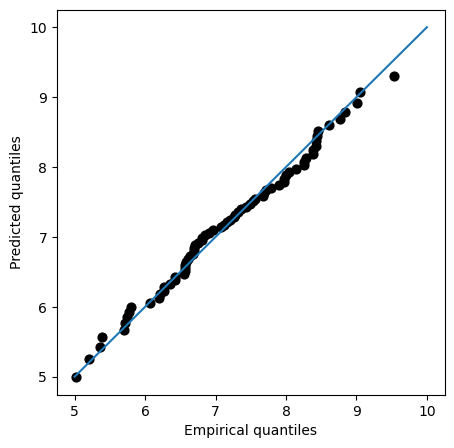

In [11]:
def calculate_ecdf(data):
    sorted_data = np.sort(data) 
    n_data = sorted_data.size 
    p_data = np.arange(1, n_data+1) / (n_data +1)
    ecdf = pd.DataFrame({'F_x':p_data, 'significant_wave_height_(m)':sorted_data})
    return ecdf

ecdf_BM = calculate_ecdf(BM_maxima['significant_wave_height_(m)'])

empirical_quantiles_BM = ecdf_BM['significant_wave_height_(m)']

pred_quantiles_GEV = stats.genextreme.ppf(ecdf_BM['F_x'], GEV_param_BM[0], GEV_param_BM[1], GEV_param_BM[2])

plt.figure(8, figsize = (5,5), facecolor='white')
plt.scatter(empirical_quantiles_BM, pred_quantiles_GEV, 40, 'k')
plt.plot([5, 10], [5, 10])
plt.xlabel('Empirical quantiles')
plt.ylabel('Predicted quantiles')

*`QQplot` compares the measured and predicted quantiles given by our fit. Therefore, the perfect fit would be the 45-degrees line. In the plot, we can see that the fit is actually very close to that line even for high values of the variable, suggesting that our model is properly modelling the tails.*

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 8:</b>
Plot the return level plot and determine the value of the significant wave height that you need for design according to your calculated return period. Remember that return level plot presents in the x-axis the values of the variable (wave height, here) and in the y-axis the corresponding values of the return period. 
    
*Hint: check the definition of return period, it is very easy!*
</p>
</div>

The following cell completes the task in 4 steps:
1. Create a linspace of the values of Hs and evaluating their non-exceedance probability (cdf)
2. Calculate the return period
3. Plot: it is common practice to plot return periods or exceedance probabilities in log-scale
4. Determine the design value for RT = 475 years

The design value of Hs using the Block Maxima & GEV approach is 9.74 m


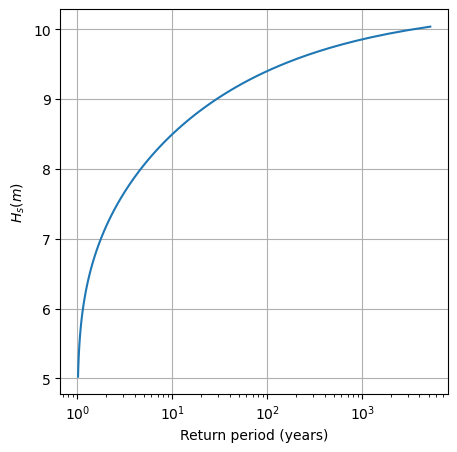

In [12]:
x = np.linspace(min(BM_maxima['significant_wave_height_(m)']), max(BM_maxima['significant_wave_height_(m)']+0.5),100)
pred_p_BM = stats.genextreme.cdf(x, GEV_param_BM[0], GEV_param_BM[1], GEV_param_BM[2])

RT_BM = 1/(1-pred_p_BM)

#
plt.figure(8, figsize = (5,5), facecolor='white')
plt.plot(RT_BM, x)
plt.xscale('log')
plt.ylabel('${H_s (m)}$')
plt.xlabel('Return period (years)')
plt.grid()

#
RT_design = 475
p_non_exceed = 1-(1/RT_design) #non-exceedance probability
design_value_BM = stats.genextreme.ppf(p_non_exceed, GEV_param_BM[0], GEV_param_BM[1], GEV_param_BM[2])
print("The design value of Hs using the Block Maxima & GEV approach is", round(design_value_BM, 2), "m")

**Note how easy it is to see the design value of the wave height for very small probabilities---these are precicely the values that will be used in your design if you have a low failure probability requirement!**

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 9:</b>
**Select two** out of the four techniques listed below and prepare a function for them: (1) Peak Over Threshold (POT), (2) Dispersion Index plot (DI), (3) Parameter stability plots, and (4) Mean residual life plot (MRL).
</p>
</div>

**You will receive the solution for this part after the workshop, since these are the functions that you will be asked to use in class!**